In [2]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from scipy import stats

data = pd.read_csv("data/preprocessed_stories.csv", header=None, names=['story'])

sia = SentimentIntensityAnalyzer()

data['negativity'] = data['story'].apply(lambda story: sia.polarity_scores(story).get('neg'))
data['neutrality'] = data['story'].apply(lambda story: sia.polarity_scores(story).get('neu'))
data['positivity'] = data['story'].apply(lambda story: sia.polarity_scores(story).get('pos'))

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

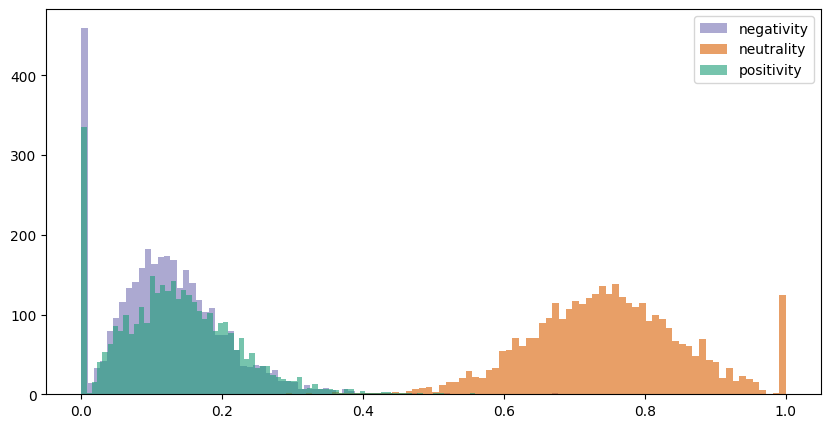

In [59]:
# colorblind friendly colors
colors = ['#7570b3', '#d95f02', '#1b9e77']

# plot histograms
plt.figure(figsize=(10, 5))
plt.hist(data['negativity'], bins=75, alpha=0.6, label='negativity', color=colors[0])
plt.hist(data['neutrality'], bins=75, alpha=0.6, label='neutrality',
         color=colors[1])
plt.hist(data['positivity'], bins=75, alpha=0.6, label='positivity',
         color=colors[2])
plt.legend(loc='upper right')
plt.show()

In [76]:
data_lemmatized = pd.read_csv("data/preprocessed_stories_lemmatized.csv", header=None, names=['story'])

data_lemmatized['negativity'] = data_lemmatized['story'].apply(lambda story: sia.polarity_scores(story).get('neg'))
data_lemmatized['neutrality'] = data_lemmatized['story'].apply(lambda story: sia.polarity_scores(story).get('neu'))
data_lemmatized['positivity'] = data_lemmatized['story'].apply(lambda story: sia.polarity_scores(story).get('pos'))

data_lemmatized

,story,negativity,neutrality,positivity
0,accepted friend request facebook common friend...,0.130,0.664,0.206
1,whatsapp message good morning baron ya receive...,0.067,0.667,0.267
2,met alan bumble claimed project manager synerg...,0.141,0.689,0.170
3,connected person named ano cab app june normal...,0.061,0.756,0.183
4,person online name june lee initially contacte...,0.081,0.740,0.179
...,...,...,...,...
3484,deceived look like got hypnosis send fake rece...,0.303,0.585,0.112
3485,linked lady called xue er made appointment mee...,0.131,0.700,0.169
3486,online platform real trading platform know des...,0.115,0.612,0.274
3487,long story short ive known guy name richard cl...,0.168,0.603,0.230


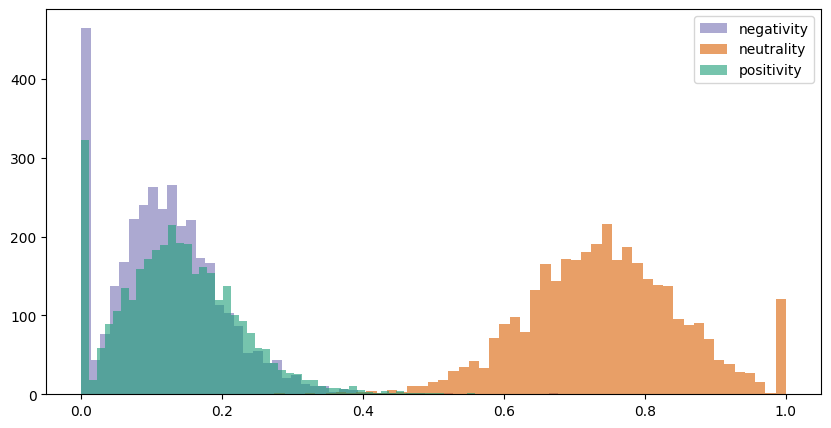

In [77]:
# plot histograms
plt.figure(figsize=(10, 5))
plt.hist(data_lemmatized['negativity'], bins=50, alpha=0.6, label='negativity', color=colors[0])
plt.hist(data_lemmatized['neutrality'], bins=50, alpha=0.6, label='neutrality',
            color=colors[1])
plt.hist(data_lemmatized['positivity'], bins=50, alpha=0.6, label='positivity',
            color=colors[2])
plt.legend(loc='upper right')
plt.show()

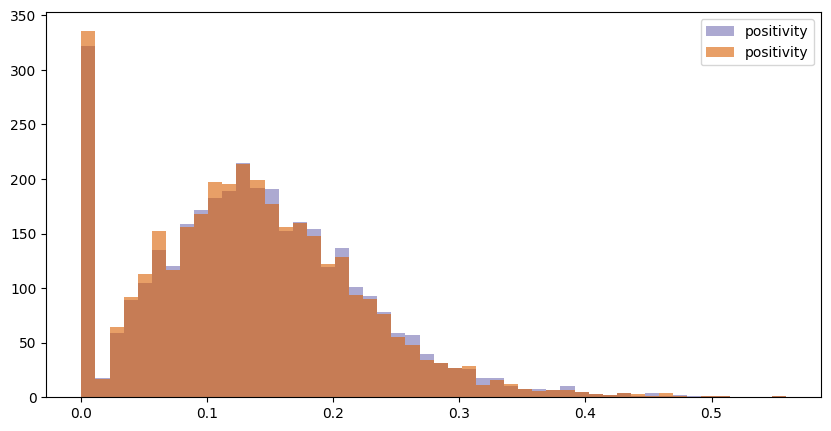

In [88]:
plt.figure(figsize=(10, 5))
plt.hist(data_lemmatized['positivity'], bins=50, alpha=0.6, label='positivity', color=colors[0])
plt.hist(data['positivity'], bins=50, alpha=0.6, label='positivity', color=colors[1])
plt.legend(loc='upper right')
plt.show()

In [89]:
print(stats.norm.fit(data['positivity']))
print(stats.norm.fit(data_lemmatized['positivity']))

(0.13484379478360561, 0.08471293198199588)
(0.13797105187732875, 0.08539798097805025)


In [58]:
import numpy as np
from gensim.corpora import Dictionary

# tokenize the stories
tokens = list(data['story'].apply(lambda story: np.array(story.split())))
dictionary = Dictionary(tokens)

words = [dictionary[i] for i in range(len(dictionary))]
word_sentiments = [sia.polarity_scores(word).get('neu') for word in words]